In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import pickle
import copy

In [2]:
input_text_path = 'kaggle/human_text.txt'
output_text_path = 'kaggle/robot_text.txt'

In [3]:
def get_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = f.read()
    return data    

In [4]:
input_text = get_data(input_text_path)
output_text = get_data(output_text_path)

In [5]:
print (input_text[:164])
print ('\n')
print (output_text[:153])

[start]
oh, thanks !  i'm fine. this is an evening in my timezone
how do you feel today ?  tell me something about yourself
how many virtual friends have you got ? 


hi there, how are you !  ?  😁😁
😄 here is afternoon ! 
my name is rdany, but you can call me dany (the r means robot). i hope we can be virtual friends ! 


In [6]:
unique_input = len({word: None for word in input_text.split()})
unique_output = len({word: None for word in output_text.split()})

print ('Number of unique words in input corpus: {}'.format(unique_input))
print ('Number of unique words in output corpus: {}'.format(unique_output))

Number of unique words in input corpus: 4307
Number of unique words in output corpus: 3995


In [7]:
print (list(set(input_text))[:20])
print ('\n')
print (list(set(output_text))[:20])

['چ', '*', '▸', 'ب', 'ñ', '😊', 'و', '😜', 'i', 'y', '5', '🤒', '🌚', 'ч', '☀', 'к', '`', 'ш', 'د', '2']


['🍝', 'چ', '*', 'ب', 'ñ', '😊', 'و', '😜', 'i', 'y', '⛄', '5', '🍤', 'ч', '☀', 'ü', '👌', '🐕', 'к', 'ш']


In [8]:
sentences_input = input_text.split('\n')
word_counts_input = [len(sentence.split()) for sentence in sentences_input]

print ('Number of sentences in input corpus: {}'.format(len(sentences_input)))
print ('Average number of words in each sentence in input corpus: {}'.format(np.average(word_counts_input)))

Number of sentences in input corpus: 2363
Average number of words in each sentence in input corpus: 9.532797291578502


In [9]:
sentences_output = output_text.split('\n')
word_counts_output = [len(sentence.split()) for sentence in sentences_output]
print ('Number of sentences in input corpus: {}'.format(len(sentences_output)))
print ('Average number of words in each sentence in input corpus: {}'.format(np.average(word_counts_output)))

Number of sentences in input corpus: 2363
Average number of words in each sentence in input corpus: 9.848074481591198


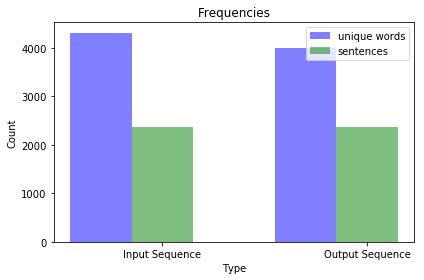

In [10]:
import matplotlib.pyplot as plt
 
n_groups = 2

unique = (unique_input, unique_output)
sentences = (len(sentences_input), len(sentences_output))
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.5
 
rects1 = plt.bar(index, unique, bar_width,
                 alpha=opacity,
                 color='b',
                 label='unique words')
 
rects2 = plt.bar(index + bar_width, sentences, bar_width,
                 alpha=opacity,
                 color='g',
                 label='sentences')
 
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Frequencies')
plt.xticks(index + bar_width, ('Input Sequence', 'Output Sequence'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [11]:
CODES = {'<PAD>': 0, '<EOS>': 1, '<UNK>': 2, '<GO>': 3 }

In [12]:
def create_lookup_tables(text):
    vocab = set(text.split())
    vocab_to_int = copy.copy(CODES)

    for v_i, v in enumerate(vocab, len(CODES)):
        vocab_to_int[v] = v_i

    int_to_vocab = {v_i: v for v, v_i in vocab_to_int.items()}

    return vocab_to_int, int_to_vocab

In [13]:
input_text = input_text.lower()
output_text = output_text.lower()

In [14]:
input_vocab_to_int, input_int_to_vocab = create_lookup_tables(input_text)
output_vocab_to_int, output_int_to_vocab = create_lookup_tables(output_text)

In [15]:
print (len(input_vocab_to_int))
print (len(input_int_to_vocab))
print (len(output_vocab_to_int))
print (len(output_int_to_vocab))

4311
4311
3999
3999


In [16]:
print (list(input_vocab_to_int.keys())[:20])
print (list(input_int_to_vocab.keys())[:20])

['<PAD>', '<EOS>', '<UNK>', '<GO>', 'gentlemen.', 'desperté', 'va', 'ping', 'envía', 'emotions.', 'twilight', 'hopkins', 'her...', 'algorithms.', 'itulah', 'e-mails', 'format', 'hell', 'fosdem', 'lie']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [17]:
print (list(output_vocab_to_int.keys())[:20])
print (list(output_int_to_vocab.keys())[:20])

['<PAD>', '<EOS>', '<UNK>', '<GO>', 'produced', 'lays', 'zef', 'desperté', 'va', 'tos', 'felicitaciones', 'emotions.', 'specifically', 'pada', 'room.', 'format', 'fosdem', 'driving', 'worry,', 'softwares']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [18]:
def text_to_ids(input_text, output_text, input_vocab_to_int, output_vocab_to_int):   
    
    input_ids = [[input_vocab_to_int[word] for word in sentence.split()]
                      for sentence in input_text.split("\n")]
    
    output_ids = [[output_vocab_to_int[word] for word in sentence.split()] + [output_vocab_to_int["<EOS>"]]
                      for sentence in output_text.split("\n")]
    
    return input_ids, output_ids

In [19]:
inputs_ids, output_ids = text_to_ids(input_text, output_text, input_vocab_to_int, output_vocab_to_int)

In [20]:
print (inputs_ids[:5])
print (output_ids[:5])

[[318], [4053, 871, 3411, 2292, 2577, 3132, 888, 234, 81, 4196, 2775, 854], [929, 2191, 3952, 1492, 3303, 3344, 1931, 3862, 2536, 4281, 3045], [929, 3628, 2090, 1058, 4185, 3952, 3569, 3344], [888, 1539, 1682, 3578, 3952, 477, 1931, 1701, 2467, 904, 3344]]
[[1907, 422, 863, 3709, 3665, 3163, 3089, 110, 1], [3985, 3405, 826, 1718, 3163, 1], [2600, 2060, 826, 1279, 836, 3665, 1755, 3953, 3571, 3678, 3375, 1154, 923, 3419, 2044, 2439, 736, 1755, 2122, 1953, 993, 3163, 1], [2044, 3889, 3357, 3163, 836, 3342, 1896, 433, 3746, 1356, 1295, 3807, 700, 1], [2894, 1364, 1682, 1641, 2146, 1248, 2620, 1168, 73, 1359, 2972, 1]]


In [21]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
#assert LooseVersion(tf.__version__) in [LooseVersion('1.0.0'), LooseVersion('1.0.1')], 'This project requires TensorFlow version 1.0  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: No GPU found. Please use a GPU to train your neural network.


In [22]:
def model_inputs():
    inputs = tf.placeholder(tf.int32, (None, None), name = "input")
    targets = tf.placeholder(tf.int32, (None, None), name="targets")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")
    keep_probability = tf.placeholder(tf.float32, name="keep_prob")
    
    return inputs, targets, learning_rate, keep_probability

In [23]:

def process_decoding_input(target_data, target_vocab_to_int, batch_size):
    go = target_vocab_to_int['<GO>']
    ending = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    targets = tf.concat([tf.fill([batch_size, 1], go), ending], 1)
    
    return targets

In [24]:

def encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob):    
    basic_lstm = tf.contrib.rnn.BasicLSTMCell(rnn_size)
    dropout = tf.contrib.rnn.DropoutWrapper(basic_lstm, keep_prob)
    rnn_cell = tf.contrib.rnn.MultiRNNCell([basic_lstm] * num_layers)
    
    _, state = tf.nn.dynamic_rnn(rnn_cell, rnn_inputs, dtype=tf.float32)
           
    return state

In [25]:
def decoding_layer_train(encoder_state, dec_cell, dec_embed_input, sequence_length, decoding_scope,
                         output_fn, keep_prob):

    train_fn = tf.contrib.seq2seq.simple_decoder_fn_train(encoder_state)
    train_pred, _, _ = tf.contrib.seq2seq.dynamic_rnn_decoder(
                        cell = dec_cell, 
                        decoder_fn = train_fn, 
                        inputs = dec_embed_input,
                        sequence_length = sequence_length,
                        scope = decoding_scope)
    
    logits = output_fn(train_pred)
    
    return logits

In [26]:
def decoding_layer_infer(encoder_state, dec_cell, dec_embeddings, start_of_sequence_id, end_of_sequence_id,
                         maximum_length, vocab_size, decoding_scope, output_fn, keep_prob):

    infer_decoder_fn  = tf.contrib.seq2seq.simple_decoder_fn_inference(
                output_fn = output_fn,
                encoder_state = encoder_state,
                embeddings = dec_embeddings,
                start_of_sequence_id = start_of_sequence_id,
                end_of_sequence_id = end_of_sequence_id,
                maximum_length = maximum_length,
                num_decoder_symbols = vocab_size)
    
    infer_logits, _, _ = tf.contrib.seq2seq.dynamic_rnn_decoder(
                            cell = dec_cell,
                            decoder_fn = infer_decoder_fn,
                           scope = decoding_scope)
    
    return infer_logits

In [27]:
def decoding_layer(dec_embed_input, dec_embeddings, encoder_state, vocab_size, sequence_length, rnn_size,
                   num_layers, target_vocab_to_int, keep_prob):
    
    basic_lstm = tf.contrib.rnn.BasicLSTMCell(rnn_size)
    dropout = tf.contrib.rnn.DropoutWrapper(basic_lstm, keep_prob)
    cell = tf.contrib.rnn.MultiRNNCell([basic_lstm] * num_layers)
    
    with tf.variable_scope("decoding") as decoding_scope:
        output_fn = (lambda x: tf.contrib.layers.fully_connected(x, vocab_size, None, scope = decoding_scope))
        
    with tf.variable_scope("decoding") as decoding_scope:
        training_logits = decoding_layer_train(encoder_state, cell, dec_embed_input,
                                            sequence_length, decoding_scope, output_fn, keep_prob)
    
    with tf.variable_scope("decoding", reuse=True) as decoding_scope:    
        inference_logits = decoding_layer_infer(encoder_state, cell, dec_embeddings, target_vocab_to_int['<GO>'],
                                                target_vocab_to_int['<EOS>'], sequence_length - 1 , vocab_size,
                                                decoding_scope, output_fn, keep_prob)
    
    return training_logits, inference_logits

In [28]:
def seq2seq_model(input_data, target_data, keep_prob, batch_size, sequence_length, source_vocab_size, target_vocab_size,
                  enc_embedding_size, dec_embedding_size, rnn_size, num_layers, target_vocab_to_int):

    enc_embed_input = tf.contrib.layers.embed_sequence(input_data, source_vocab_size, enc_embedding_size)
    encoder_state = encoding_layer(enc_embed_input, rnn_size, num_layers, keep_prob)

    dec_inputs = process_decoding_input(target_data, target_vocab_to_int, batch_size)
    dec_embeddings = tf.Variable(tf.truncated_normal([target_vocab_size, dec_embedding_size], stddev = 0.01))
    dec_embed_inputs = tf.nn.embedding_lookup(dec_embeddings, dec_inputs)
        
    train_logits, infer_logits = decoding_layer(
                               dec_embed_input = dec_embed_inputs,
                               dec_embeddings = dec_embeddings,
                               encoder_state = encoder_state,
                               vocab_size = target_vocab_size,
                               sequence_length = sequence_length,
                               rnn_size = rnn_size,
                               num_layers = num_layers,
                               target_vocab_to_int = target_vocab_to_int,
                               keep_prob = keep_prob)
    
    return train_logits, infer_logits

In [29]:
epochs = 7
batch_size = 256
rnn_size = 512
num_layers = 2
encoding_embedding_size = 13
decoding_embedding_size = 13
learning_rate = 0.001
keep_probability = 0.7

In [30]:
save_path = 'checkpoints/dev'
max_source_sentence_length = max([len(sentence) for sentence in inputs_ids])

train_graph = tf.Graph()
with train_graph.as_default():
    input_data, targets, lr, keep_prob = model_inputs()
    sequence_length = tf.placeholder_with_default(max_source_sentence_length, None, name='sequence_length')
    input_shape = tf.shape(input_data)
    
    train_logits, inference_logits = seq2seq_model(
        tf.reverse(input_data, [-1]), targets, keep_prob, batch_size, sequence_length, len(input_vocab_to_int), len(output_vocab_to_int),
        encoding_embedding_size, decoding_embedding_size, rnn_size, num_layers, output_vocab_to_int)

    tf.identity(inference_logits, 'logits')
    with tf.name_scope("optimization"):
        # Loss function
        cost = tf.contrib.seq2seq.sequence_loss(
            train_logits,
            targets,
            tf.ones([input_shape[0], sequence_length]))

        # Optimizer
        optimizer = tf.train.AdamOptimizer(lr)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)

ValueError: Attempt to reuse RNNCell <tensorflow.contrib.rnn.python.ops.core_rnn_cell_impl.BasicLSTMCell object at 0x10aa91550> with a different variable scope than its first use.  First use of cell was with scope 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell', this attempt is with scope 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell'.  Please create a new instance of the cell if you would like it to use a different set of weights.  If before you were using: MultiRNNCell([BasicLSTMCell(...)] * num_layers), change to: MultiRNNCell([BasicLSTMCell(...) for _ in range(num_layers)]).  If before you were using the same cell instance as both the forward and reverse cell of a bidirectional RNN, simply create two instances (one for forward, one for reverse).  In May 2017, we will start transitioning this cell's behavior to use existing stored weights, if any, when it is called with scope=None (which can lead to silent model degradation, so this error will remain until then.)

In [31]:
def pad_sentence_batch(sentence_batch):
    """
    Pad sentence with <PAD> id
    """
    max_sentence = max([len(sentence) for sentence in sentence_batch])
    return [sentence + [CODES['<PAD>']] * (max_sentence - len(sentence))
            for sentence in sentence_batch]

def batch_data(source, target, batch_size):
    """
    Batch source and target together
    """
    for batch_i in range(0, len(source)//batch_size):
        start_i = batch_i * batch_size
        source_batch = source[start_i:start_i + batch_size]
        target_batch = target[start_i:start_i + batch_size]
        yield np.array(pad_sentence_batch(source_batch)), np.array(pad_sentence_batch(target_batch))

In [ ]:
import time

def get_accuracy(target, logits):
    """
    Calculate accuracy
    """
    max_seq = max(target.shape[1], logits.shape[1])
    if max_seq - target.shape[1]:
        target = np.pad(
            target,
            [(0,0),(0,max_seq - target.shape[1])],
            'constant')
    if max_seq - logits.shape[1]:
        logits = np.pad(
            logits,
            [(0,0),(0,max_seq - logits.shape[1]), (0,0)],
            'constant')

    return np.mean(np.equal(target, np.argmax(logits, 2)))

train_source = inputs_ids[batch_size:]
train_target = output_ids[batch_size:]

valid_source = pad_sentence_batch(inputs_ids[:batch_size])
valid_target = pad_sentence_batch(output_ids[:batch_size])

with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(epochs):
        for batch_i, (source_batch, target_batch) in enumerate(batch_data(train_source, train_target, batch_size)):
            start_time = time.time()
            
            _, loss = sess.run(
                [train_op, cost],
                {input_data: source_batch,
                 targets: target_batch,
                 lr: learning_rate,
                 sequence_length: target_batch.shape[1],
                 keep_prob: keep_probability})
            
            batch_train_logits = sess.run(
                inference_logits,
                {input_data: source_batch, keep_prob: 1.0})
            batch_valid_logits = sess.run(
                inference_logits,
                {input_data: valid_source, keep_prob: 1.0})
                
            train_acc = get_accuracy(target_batch, batch_train_logits)
            valid_acc = get_accuracy(np.array(valid_target), batch_valid_logits)
            end_time = time.time()
            print('Epoch {:>3} Batch {:>4}/{} - Train Accuracy: {:>6.3f}, Validation Accuracy: {:>6.3f}, Loss: {:>6.3f}'
                  .format(epoch_i, batch_i, len(inputs_ids) // batch_size, train_acc, valid_acc, loss))

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_path)
    print('Model Trained and Saved')